In [1]:
import numpy as np
import HindiCharts as hc
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as mfm
import MatplotlibKeyMap as mk
import os
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import re
import networkx as nx 
import matplotlib

In [2]:
sentences = []
df_words = pd.DataFrame(columns=['word', 'frequency'])
df_monograms = pd.DataFrame(columns=['monogram', 'frequency'])
df_digrams = pd.DataFrame(columns=['digram', 'frequency'])
df_triagrams = pd.DataFrame(columns=['triagram', 'frequency'])
df_endings = pd.DataFrame(columns=['ending', 'frequency'])
df_vyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
df_matra = pd.DataFrame(columns=['matra', 'frequency'])
df_halfLetters = pd.DataFrame(columns=['halfLetter', 'frequency'])
df_swar = pd.DataFrame(columns=['swar', 'frequency'])

In [3]:
print(hc.vyanjans)

['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह']


In [4]:
vyanjanCol = np.array(hc.vyanjans)
vyanjanFreq = np.zeros(len(vyanjanCol), dtype=float)

df_vyanjan['vyanjan'] = vyanjanCol
df_vyanjan['frequency'] = vyanjanFreq

print(df_vyanjan)

   vyanjan  frequency
0        क        0.0
1        ख        0.0
2        ग        0.0
3        घ        0.0
4        ङ        0.0
5        च        0.0
6        छ        0.0
7        ज        0.0
8        झ        0.0
9        ञ        0.0
10       ट        0.0
11       ठ        0.0
12       ड        0.0
13       ढ        0.0
14       ण        0.0
15       त        0.0
16       थ        0.0
17       द        0.0
18       ध        0.0
19       न        0.0
20       प        0.0
21       फ        0.0
22       ब        0.0
23       भ        0.0
24       म        0.0
25       य        0.0
26       र        0.0
27       ल        0.0
28       व        0.0
29       श        0.0
30       ष        0.0
31       स        0.0
32       ह        0.0


In [5]:
matraCol = np.array(hc.matras)
matraFreq = np.zeros(len(matraCol), dtype=float)

df_matra['matra'] = matraCol
df_matra['frequency'] = matraFreq

print(df_matra)



   matra  frequency
0      ा        0.0
1      ि        0.0
2      ी        0.0
3      ु        0.0
4      ू        0.0
5      े        0.0
6      ै        0.0
7      ो        0.0
8      ौ        0.0
9      ं        0.0
10     ः        0.0
11     ँ        0.0
12     ृ        0.0


In [6]:
swarCol=np.array(hc.swars)
swarFreq=np.zeros(len(swarCol), dtype=float)

df_swar['swar']=swarCol
df_swar['frequency']=swarFreq

print(df_swar)

   swar  frequency
0     अ        0.0
1     आ        0.0
2     इ        0.0
3     ई        0.0
4     उ        0.0
5     ऊ        0.0
6     ए        0.0
7     ऐ        0.0
8     ओ        0.0
9     औ        0.0
10   अं        0.0
11   अः        0.0
12    ऋ        0.0


In [7]:
def InsertOrIncrease(df, type,word):
    if df[type].isin([word]).any():
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        df.loc[len(df)] = [word, 1]

In [8]:
def generateCSV(df, name):
    df['frequency']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format

    df.to_csv(name, index=False)

In [9]:
def generateCSV_filePath(df, name, filePath):
    df['frequency']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format
    if not os.path.exists(filePath):
        os.makedirs(filePath)
    df.to_csv(filePath+name, index=False)

In [10]:
with open('sampleText.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            df_vyanjan.loc[df_vyanjan['vyanjan'] == word[i], 'frequency'] += 1
            df_matra.loc[df_matra['matra'] == word[i], 'frequency'] += 1
            df_swar.loc[df_swar['swar'] == word[i], 'frequency'] += 1
            if(word[i]=='्'):
                # print(f'Half letter {word[i-1]}{word[i]} detected in {word}')
                InsertOrIncrease(df_halfLetters, 'halfLetter',word[i-1]+word[i])
            
            
                            
        if len(word) ==1:
            InsertOrIncrease(df_monograms, 'monogram',word)
        
        if len(word) ==2:
            InsertOrIncrease(df_digrams, 'digram',word) 
            
        if len(word) ==3:
            InsertOrIncrease(df_triagrams, 'triagram',word)
        
        if word[-1]=='।':
            InsertOrIncrease(df_endings, 'ending',word[:-1])
        
        
generateCSV(df_vyanjan, 'vyanjan.csv')

generateCSV(df_matra, 'matra.csv')

generateCSV(df_monograms, 'monograms.csv')

generateCSV(df_digrams, 'digrams.csv')

generateCSV(df_triagrams, 'triagrams.csv')

generateCSV(df_endings, 'endings.csv')

generateCSV(df_halfLetters, 'halfLetters.csv')

generateCSV(df_swar, 'swar.csv')



Number of words: 42426


In [11]:
def PlotBarGraph(df, name):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()
    plt.title('Probability of occurence of different characters',fontsize=10)
    # print(arr)
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
    # print(arr)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    ax.set_ylabel('Probability')

    sns.barplot(x=arr, y=df['frequency'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)

    plt.savefig(name+'.png')

In [12]:

def PlotBarGraph_filePath(df,name,path, char, nextCharType):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()

    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]

    if nextCharType=='vyanjan':
        plt.title(f'Next vyanjan after ', loc='left',fontsize=12)
    elif nextCharType=='matra':
        plt.title(f'Next matra after ', loc='left',fontsize=12)
    elif nextCharType=='swar':
        plt.title(f'Next swar after ', loc='left',fontsize=12)
        
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    
    plt.title(mk.Vyanjanmap[char],loc='center', fontproperties=prop,fontsize=20)
    
    sns.barplot(x=arr, y=df['frequency'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)
    ax.set_ylabel('Probability')
    
    if not os.path.exists(path):
        os.makedirs(path)

    plt.savefig(path+name+'.png')

In [31]:
# Plot histogram of frequency of probablity on x axis and frequency of that probablity on y axis

def PlotHistogram(df, name):
    plt.figure()
    plt.title('Probability of occurence of different characters',fontsize=10)
    plt.hist(df['frequency'], bins=100)
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.savefig(name+'.png')
    

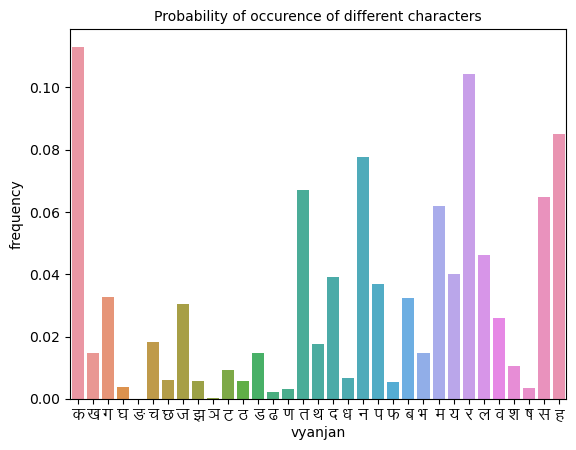

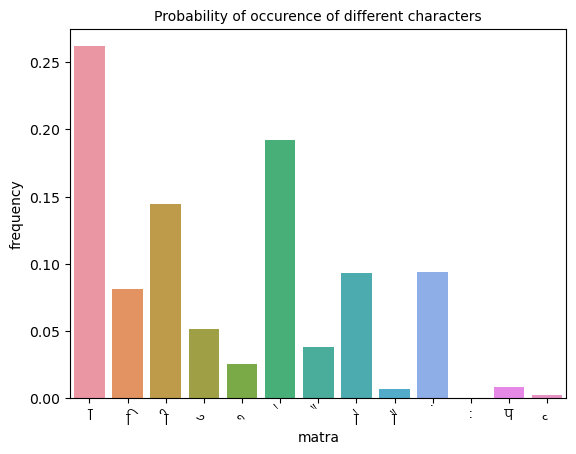

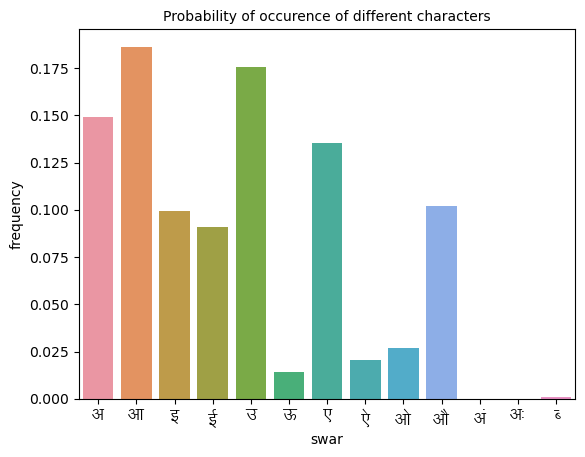

In [14]:
PlotBarGraph(df_vyanjan, 'vyanjan')
PlotBarGraph(df_matra, 'matra')
PlotBarGraph(df_swar, 'swar')

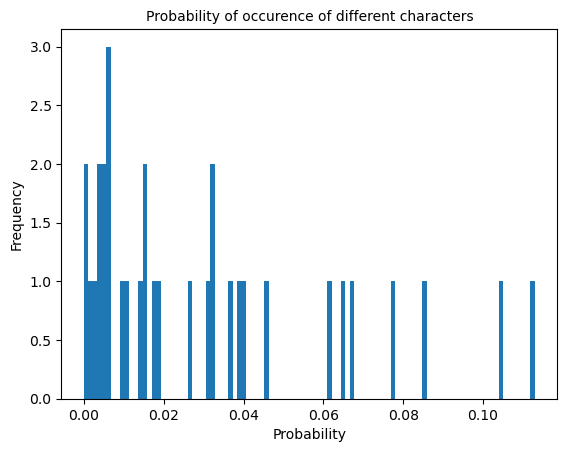

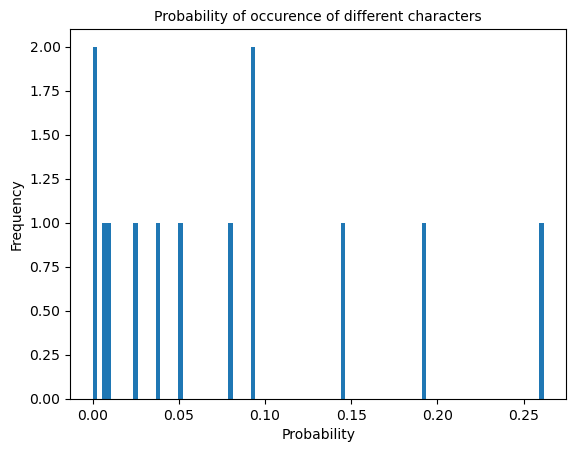

In [33]:
PlotHistogram(df_vyanjan, 'vyanjan')
PlotHistogram(df_matra, 'matra')

Individual Character Analysis:

In [16]:
comp_char = 'ब'
df_tempVyanjan=pd.DataFrame()
df_tempSwar=pd.DataFrame()
df_tempMatra=pd.DataFrame()

vyanjanCol = np.array(hc.vyanjans)
swarCol = np.array(hc.swars)
matraCol = np.array(hc.matras)

df_tempVyanjan['vyanjan'] = vyanjanCol
df_tempVyanjan['frequency'] = np.zeros(len(vyanjanCol),dtype=float)

df_tempSwar['swar'] = swarCol
df_tempSwar['frequency'] = np.zeros(len(swarCol),dtype=float)

df_tempMatra['matra'] = matraCol
df_tempMatra['frequency'] = np.zeros(len(matraCol),dtype=float)

with open('sampleText.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            if word[i]==comp_char and i+1!=len(word):
                df_tempVyanjan.loc[df_tempVyanjan['vyanjan'] == word[i+1], 'frequency'] += 1
                df_tempMatra.loc[df_tempMatra['matra'] == word[i+1], 'frequency'] += 1
                df_tempSwar.loc[df_tempSwar['swar'] == word[i+1], 'frequency'] += 1

print(df_tempVyanjan)
print(df_tempMatra)
print(df_tempSwar)

Number of words: 42426
   vyanjan  frequency
0        क   28.00000
1        ख    6.00000
2        ग   15.00000
3        घ    2.00000
4        ङ    0.00000
5        च   89.00000
6        छ    0.00000
7        ज   31.00000
8        झ    0.00000
9        ञ    0.00000
10       ट    8.00000
11       ठ    1.00000
12       ड  123.00000
13       ढ   19.00000
14       ण    0.00000
15       त   35.00000
16       थ    0.00000
17       द   53.00000
18       ध    3.00000
19       न  112.00000
20       प    0.00000
21       फ    0.00000
22       ब    0.00000
23       भ    0.00000
24       म    1.00000
25       य    4.00000
26       र  116.00000
27       ल   49.00000
28       व    0.00000
29       श    0.00000
30       ष    0.00000
31       स   49.00000
32       ह  121.00000
   matra  frequency
0      ा  496.00000
1      ि   84.00000
2      ी   72.00000
3      ु   71.00000
4      ू   95.00000
5      े  128.00000
6      ै  122.00000
7      ो  173.00000
8      ौ    2.00000
9      ं   28.00000
10     ः 

All Character Analysis:

In [17]:
Vyanjandf = {}
Swardf = {}
Matradf = {}

emptVyanjanCol = np.array(hc.vyanjans)
emptSwarCol = np.array(hc.swars)
emptMatraCol = np.array(hc.matras)

df_emptyVyanjan = pd.DataFrame()
df_emptyMatra = pd.DataFrame()
df_emptySwar = pd.DataFrame()

df_emptyVyanjan['vyanjan'] = emptVyanjanCol
df_emptyVyanjan['frequency'] = np.zeros(len(emptVyanjanCol),dtype=float)

df_emptyMatra['matra'] = emptMatraCol
df_emptyMatra['frequency'] = np.zeros(len(emptMatraCol),dtype=float)

df_emptySwar['swar'] = emptSwarCol
df_emptySwar['frequency'] = np.zeros(len(emptSwarCol),dtype=float)


for i in range(len(hc.vyanjans)):
    Vyanjandf[hc.vyanjans[i]] = [df_emptyVyanjan.copy(),df_emptyMatra.copy(),df_emptySwar.copy()]
        
with open('sampleText.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            if word[i] in hc.vyanjans and i+1!=len(word):

                if word[i+1] in hc.vyanjans:
                    Vyanjandf[word[i]][0].loc[Vyanjandf[word[i]][0]['vyanjan'] == word[i+1], 'frequency'] += 1
                elif word[i+1] in hc.matras:
                    Vyanjandf[word[i]][1].loc[Vyanjandf[word[i]][1]['matra'] == word[i+1], 'frequency'] += 1
                elif word[i+1] in hc.swars:
                    Vyanjandf[word[i]][2].loc[Vyanjandf[word[i]][2]['swar'] == word[i+1], 'frequency'] += 1



Number of words: 42426


In [18]:
np.save('VyanjanDict.npy', Vyanjandf, allow_pickle=True)

# # Load
# read_dictionary = np.load('my_file.npy',allow_pickle='TRUE').item()
# print(read_dictionary['hello']) # displays "world"

Graph for immediate next vyanjan

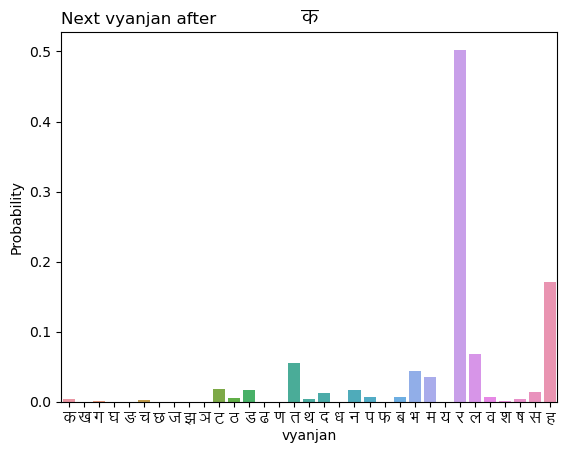

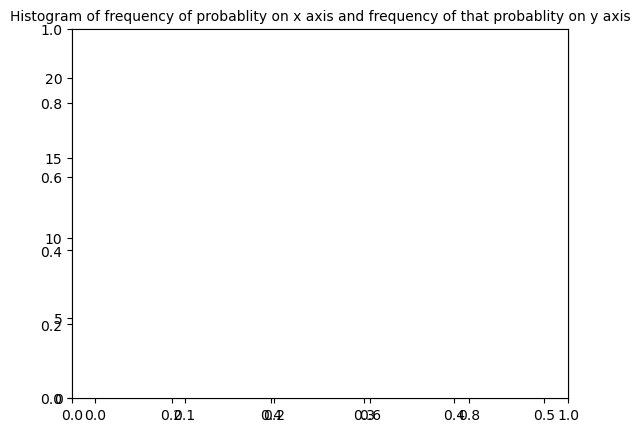

In [19]:
generateCSV_filePath(Vyanjandf['क'][0],'vyanjanChart.csv','./data/क/')

PlotBarGraph_filePath(Vyanjandf['क'][0],'vyanjan','./data/क/','क','vyanjan')
PlotHistogram(Vyanjandf['क'][0],'vyanjan')

Graph for immediate next matra

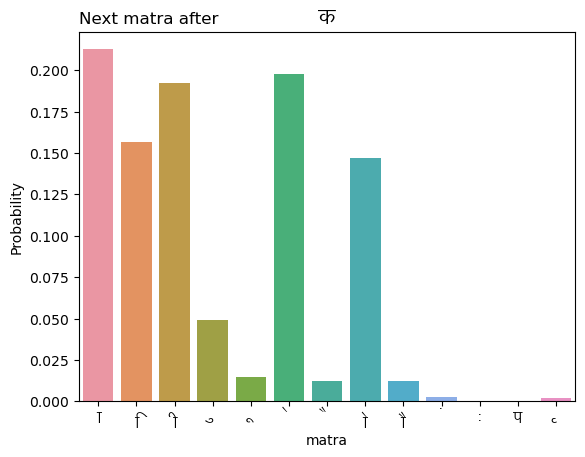

In [20]:
generateCSV_filePath(Vyanjandf['क'][1],'matraChart.csv','./data/क/')

PlotBarGraph_filePath(Vyanjandf['क'][1],'matra','./data/क/','क','matra')

Generate bar graph for next vyanjans

In [ ]:
for i in range(len(hc.vyanjans)):
    generateCSV_filePath(Vyanjandf[hc.vyanjans[i]][0],f'vyanjanChart{i}.csv',f'./data/{hc.vyanjans[i]}/')
    PlotBarGraph_filePath(Vyanjandf[hc.vyanjans[i]][0],'vyanjan',f'./data/{hc.vyanjans[i]}/',hc.vyanjans[i],'vyanjan')
    

Generate bar graph for next matras

In [ ]:
for i in range(len(hc.vyanjans)):
    generateCSV_filePath(Vyanjandf[hc.vyanjans[i]][1],f'matraChart{i}.csv',f'./data/{hc.vyanjans[i]}/')
    PlotBarGraph_filePath(Vyanjandf[hc.vyanjans[i]][1],'matra',f'./data/{hc.vyanjans[i]}/',hc.vyanjans[i],'matra')

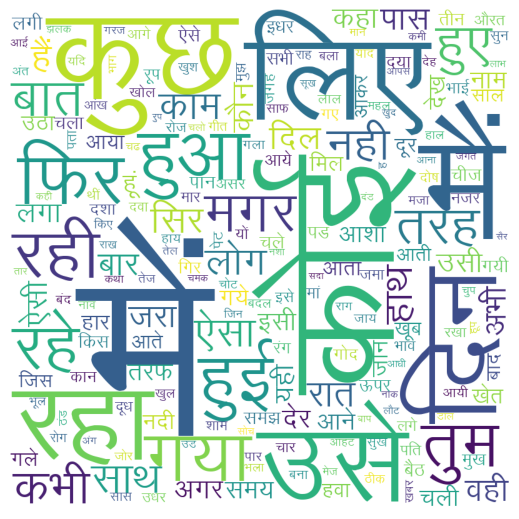

In [23]:
df=pd.DataFrame()

df=pd.read_csv("triagrams.csv")

# change the 1st column values 

for i in df.iloc[:,0]:
    text=""
    textList=[]
    for j in i:
        if j in mk.Vyanjanmap:
            text=text+mk.Vyanjanmap[j]
            textList.append(mk.Vyanjanmap[j])
        elif j in mk.SwarMap:
            text=text+mk.SwarMap[j]
            textList.append(mk.SwarMap[j])
        elif j in mk.MatraMap:
            if j=='ि':
                text=text+mk.MatraMap[j]
                textList.insert(-1,mk.MatraMap[j])
            else:
                text=text+mk.MatraMap[j]
                textList.append(mk.MatraMap[j])
    # print(f'For {i} the text is {text} and textList is {textList}')
    text1 = ''.join(textList)
    # print(f'For {i} the text is {text} and text1 is {text1}')
    df.replace(i,text1,inplace=True)
# print(df.head())

freq = [tuple(x) for x in df.values]

wordcloud = WordCloud(font_path='KrutiDev-010.TTF',width = 800, height = 800,background_color ='white').generate_from_frequencies(dict(freq))

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

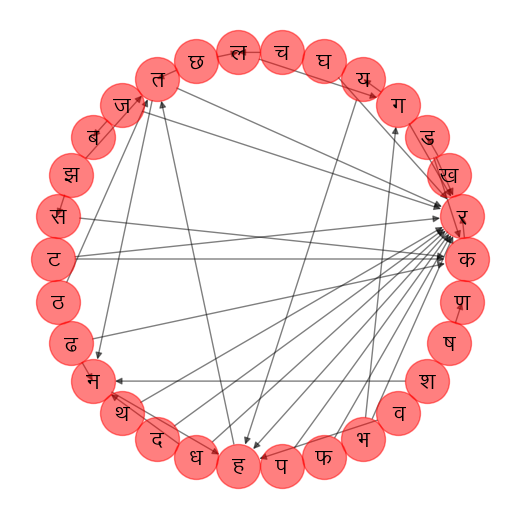

In [30]:
# create graph from word frequency tuples

G = nx.DiGraph()


for i in Vyanjandf:
    for j in Vyanjandf[i][0].values:
        if j[1]>0.20:
            G.add_edge(mk.Vyanjanmap[i],mk.Vyanjanmap[j[0]],weight=j[1])
            # print(f'Edge added between {mk.Vyanjanmap[i]} and {mk.Vyanjanmap[j[0]]} with weight {j[1]}')

# draw graph in kamael layout
plt.figure(figsize=(5,5))

nx.draw_circular(G, with_labels=False, font_size=10, node_size=1000, node_color='red', edge_color='black', width=1, alpha=0.5, arrows=True)
nodePos = nx.circular_layout(G)

# Write text at these node Positions
font_path = "KrutiDev-010.TTF"
prop = mfm.FontProperties(fname=font_path)

for key, value in nodePos.items():
    plt.text(value[0], value[1], key, fontsize=20, fontproperties=prop, horizontalalignment='center', verticalalignment='center')
    
plt.show()


